 # Taller Ciencia de Datos 

### ***Tarea Laboratorio 2019***

---
<div class="text-center"> Andrea Correa </div>
<div class="text-center">Maria Laura Gayo </div>
<div class="text-center"> Mariano Koci </div>
<div class="text-center">Alejandro Wohlwend </div>
<div class="text-center">Renzo Daset </div>
<div class="text-center">Laura Rodriguez </div>

---


<a id='Indice'></a>
### Índice

1. [Adquisición de datos](#Adquisicion-Datos)
    1. [Import de CSV](#Import-CSV)
    1. [Unión de archivos](#Union)
    
2. [Transformación de los datos](#Transformacion)
    2. [Transformación de Adjudicaciones](#Transformación-Adjudicaciones)
    2. [Transformación de Monedas](#Transformación-Moneda)
    2. [Transformación de valor 0 ](#Transformación-Invalidos)
    
3. [Análisis de los objetivos del Negocio y como se mapeo a los datos disponibles](#Analisis)

4. [Análisis y visualización para los requerimientos de negocio](#Visualización)

5. [Conclusiones](#Conclusiones)

---

In [1]:
# Importamos la libreria dplyr
library(dplyr)
install.packages("tidyverse")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





The downloaded binary packages are in
	/var/folders/ly/95h1nybs1bqbfq40d29xnmdc0000gn/T//RtmpYI3BUa/downloaded_packages


<a id='Adquisicion-Datos'></a>
### Adquisición de los Datos
[Inicio ▲](#Indice)

---

 La ingesta de datos se realizó  mediante los pasos que se muestran a continuación:




In [2]:
# Importamos los archivos CSV
archivo <- "compras2018_1ero.csv"
archivo2 <- "compras2018_2do.csv"

In [3]:
# Cargamos datos del archivo
datos <- read.csv(archivo)

In [4]:
# Cargamos datos del archivo
datos2 <- read.csv(archivo2)

In [5]:
# Unimos los datos de ambos archivos
datosAll<-rbind(datos,datos2)

In [6]:
# Imprimmimos las primeras filas del CSV
count(datosAll) # contamos la cantidad de registros
names(datos) # Con 'names' obtenemos todos los nombres de los variables
head(datos)


n
<int>
55373


[1] "anio_compra"           "apel"                  "arch_adj"             
 [4] "arch_reiteracion"      "es_reiteracion"        "estado_compra"        
 [7] "fecha_compra"          "fecha_pub_adj"         "fondos_rotatorios"    
[10] "id_compra"             "id_inciso"             "id_moneda_monto_adj"  
[13] "id_tipo_resol"         "id_tipocompra"         "id_ue"                
[16] "monto_adj"             "nro_ampliacion"        "num_compra"           
[19] "num_resol"             "objeto"                "subtipo_compra"       
[22] "open_contracting_link"

anio_compra,apel,arch_adj,arch_reiteracion,es_reiteracion,estado_compra,fecha_compra,fecha_pub_adj,fondos_rotatorios,id_compra,⋯,id_tipo_resol,id_tipocompra,id_ue,monto_adj,nro_ampliacion,num_compra,num_resol,objeto,subtipo_compra,open_contracting_link
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,⋯,<int>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<fct>
2017,N,acta_620613.pdf,,N,7,21/12/2017,03/01/2018 16:25,N,620613,⋯,1,LA,31,17910.00,0,12,1217,Adquisición de 1 camioneta para el Departamento de Ciencias Sociales del CENUR Litoral Norte - Sede Salto,COM,https://comprasestatales.gub.uy/ocds/record/620613
2017,S,acta_620880.doc,,N,7,12/12/2017,03/01/2018 12:45,N,620880,⋯,1,CD,103,12195.03,0,295,2952017,ADQUISICIÓN DE ARTÍCULOS DE SANITARIA. Importante leer el pliego de a compra para cotizar de forma correcta. Solo se aceptan cotizaciones en línea.,COM,https://comprasestatales.gub.uy/ocds/record/620880
2017,S,acta_620374.pdf,,N,7,19/12/2017,02/01/2018 15:00,N,620374,⋯,1,CD,16,12468.40,0,22,1,"Compra Directa de Cartuchos para Artes Gráficas, Cotizar en función del pliego ingresado. Las ofertas se reciben solo por la página de Compras Estatales.",COM,https://comprasestatales.gub.uy/ocds/record/620374
2017,N,acta_621095.docx,,N,7,26/12/2017,05/01/2018 10:30,N,621095,⋯,3,CP,1,0.00,0,5066,15,Contratación de empresa para colocación de relleno en wetland del Liceo de Empalme Olmos - Ver pliego y planos adjuntos - No se aceptan ofertas en línea,COM,https://comprasestatales.gub.uy/ocds/record/621095
2017,S,,,N,7,28/12/2017,03/01/2018 14:15,N,621195,⋯,1,CD,103,13908.00,0,33550,0,"1 Agitador lineal, con capacidad máxima de carga de 7kgs, temporizador y regulador de velocidad, 220volt Leer adjunto.-",COM,https://comprasestatales.gub.uy/ocds/record/621195
2017,S,acta_621246.pdf,,N,7,26/12/2017,03/01/2018 14:45,N,621246,⋯,1,LA,16,1679118.94,0,11,1,"Obra: ""SUMINISTRO Y COLOCACIÓN DE ASCENSOR MONTACARGAS SIN SALA DE MÁQUINA"". Cotizar según pliego. Visita a obra 07/12/2017, hora 14:30, Facultad de Artes (18 de Julio 1772)",COM,https://comprasestatales.gub.uy/ocds/record/621246


<a id='Analisis'></a>
### Análisis de los requerimientos planteados

[Inicio ▲](#Indice)

---
*Se quiere obtener la siguiente información a partir de los datos*
&nbsp;

1. TOP 20 de las organizaciones que gastaron más dinero (ordenados de forma descendente).
2. TOP 50 de las compras más caras.
3. Agregación de monto total por tipo de producto
4. TOP 10 de las unidades ejecutoras que más compraron en el periodo
5. Compras directas mayores $436.000.


**Descripción de los puntos solicitados:**


1. Con cuántos datos cuentan para el análisis?
<br>
Para el análisis se cuenta con 55373 registros.
2. Cuáles columnas cree que serán de utilidad para resolver los requerimientos planteados ?
<br>
Según los requerimientos planteados y los datos disponibles para el análisis consideramos que son necesarias las columnas que se seleccionan en la siguiente línea.
Por otro lado para cumplir con el requerimiento "Agregación de monto total por tipo de producto", se nos presenta la siguiente dificultad:
        Consideramos que la columna a utilizar es la llamada "objeto", al observar los datos que se incluyen en ella encontramos que no poseen la estructura necesaria para una óptima agrupación (corresponden a diferentes tipos de datos y no cumplen con ningún patrón). Debido a esto consideramos utilizar la columna "subtipo_compra" la cual contiene un patrón ordenable de datos, pero en este caso la mayoría de los registros son clasificados con "COM",  que corresponde al tipo de compra "COMÚN". 
3. Qué problema identifica con los datos cargados si es que los hay.
<br>
Uno de los problemas, se plantea en el punto 2, en el caso de que sea necesaria la utilización de la columna OBJETO.
El otro problema que se presenta es referido a la identificación de aquellos registros con codigeras asociadas a sus descripciones.


In [73]:
# Selecciona solamente las columnas Anio_Compra, id_moneda_monto_adj, id_ue, monto_adj,  
dataSelect <- select(datosAll, anio_compra, id_inciso,id_moneda_monto_adj, id_ue, monto_adj,id_tipocompra);

In [74]:
# Imprimo primeras filas del CSV
head(dataSelect)

anio_compra,id_inciso,id_moneda_monto_adj,id_ue,monto_adj,id_tipocompra
<int>,<int>,<int>,<int>,<dbl>,<fct>
2017,26,1,31,17910.00,LA
2017,29,0,103,12195.03,CD
2017,26,0,16,12468.40,CD
2017,25,0,1,0.00,CP
2017,12,0,103,13908.00,CD
2017,26,0,16,1679118.94,LA


In [95]:
#Agrupamos los datos 

MonedasFilasMutate <- MonedasFilas %>% mutate_at(c("id-moneda"), as.character)
#datosOrdenados <- left_join(dataSelect, MonedasFilas, by = c(id_moneda_monto_adj = "id-moneda"))
#datosOrdenados <-dataSelect %>% group_by(anio_compra, id_inciso, id_ue) 
#%>% summarise(monto = sum(monto_adj))
#f<-arrange(datosOrdenados, desc(monto))
#tail(datosOrdenados, 30)

ERROR: Error in UseMethod("tbl_vars"): no applicable method for 'tbl_vars' applied to an object of class "c('matrix', 'character')"


In [11]:
archivo_xml = "reporteUnidadesEjecutoras.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlUnidadesEjecutoras <- read_xml(archivo_xml)
print(xmlUnidadesEjecutoras)

{xml_document}
<unidades-ejecutoras>
 [1] <unidad-ejecutora id-inciso="1" id-ue="1" nom-ue="Cámara de Senadores"/>
 [2] <unidad-ejecutora id-inciso="1" id-ue="2" nom-ue="Cámara de Representant ...
 [3] <unidad-ejecutora id-inciso="1" id-ue="3" nom-ue="Comisión Administrativ ...
 [4] <unidad-ejecutora id-inciso="2" id-ue="1" nom-ue="Presidencia  de la Rep ...
 [5] <unidad-ejecutora id-inciso="2" id-ue="3" nom-ue="Casa Militar"/>
 [6] <unidad-ejecutora id-inciso="2" id-ue="4" nom-ue="Oficina de Planeamient ...
 [7] <unidad-ejecutora id-inciso="2" id-ue="5" nom-ue="NO VIGENTE - Dirección ...
 [8] <unidad-ejecutora id-inciso="2" id-ue="6" nom-ue="Unidad Reguladora de S ...
 [9] <unidad-ejecutora id-inciso="2" id-ue="7" nom-ue="Instituto Nacional de  ...
[10] <unidad-ejecutora id-inciso="2" id-ue="8" nom-ue="Oficina Nacional del S ...
[11] <unidad-ejecutora id-inciso="2" id-ue="9" nom-ue="Unidad Reguladora de S ...
[12] <unidad-ejecutora id-inciso="2" id-ue="10" nom-ue="AGESIC"/>
[13] <unid

In [12]:
archivo_xml = "reporteIncisos.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlIncisos <- read_xml(archivo_xml)
print(xmlIncisos)

{xml_document}
<incisos>
 [1] <inciso id-inciso="1" nom-inciso="Poder Legislativo"/>
 [2] <inciso id-inciso="2" nom-inciso="Presidencia de la República"/>
 [3] <inciso id-inciso="3" nom-inciso="Ministerio de Defensa Nacional"/>
 [4] <inciso id-inciso="4" nom-inciso="Ministerio del Interior"/>
 [5] <inciso id-inciso="5" nom-inciso="Ministerio de Economía y Finanzas"/>
 [6] <inciso id-inciso="6" nom-inciso="Ministerio de Relaciones Exteriores"/>
 [7] <inciso id-inciso="7" nom-inciso="Ministerio de Ganadería, Agricultura y ...
 [8] <inciso id-inciso="8" nom-inciso="Ministerio de Industria, Energía y Min ...
 [9] <inciso id-inciso="9" nom-inciso="Ministerio de Turismo"/>
[10] <inciso id-inciso="10" nom-inciso="Ministerio de Transporte y Obras Públ ...
[11] <inciso id-inciso="11" nom-inciso="Ministerio de Educación y Cultura"/>
[12] <inciso id-inciso="12" nom-inciso="Ministerio de Salud Pública"/>
[13] <inciso id-inciso="13" nom-inciso="Ministerio de Trabajo y Seguridad Soc ...
[14] <inciso

In [13]:
archivo_xml = "reporteMonedas.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlMonedas <- read_xml(archivo_xml)
print(xmlMonedas)

{xml_document}
<monedas>
 [1] <moneda id-moneda="0" desc-moneda="PESOS URUGUAYOS" sigla-moneda="$" id- ...
 [2] <moneda id-moneda="1" desc-moneda="DOLAR PIZARRA VENDEDOR" sigla-moneda= ...
 [3] <moneda id-moneda="2" desc-moneda="DOLAR INTERBANCARIO VENDEDOR" sigla-m ...
 [4] <moneda id-moneda="3" desc-moneda="FRANCO FRANCES" sigla-moneda="FF" id- ...
 [5] <moneda id-moneda="4" desc-moneda="UNIDAD INDEXADA" sigla-moneda="UNIDAD ...
 [6] <moneda id-moneda="5" desc-moneda="UNIDAD REAJUSTABLE" sigla-moneda="UR" ...
 [7] <moneda id-moneda="6" desc-moneda="MARCO ALEMAN" sigla-moneda="DM" id-mo ...
 [8] <moneda id-moneda="7" desc-moneda="FRANCO BELGA" sigla-moneda="FB" id-mo ...
 [9] <moneda id-moneda="8" desc-moneda="DOLAR CANADIENSE" sigla-moneda="DC" i ...
[10] <moneda id-moneda="9" desc-moneda="PESETAS" sigla-moneda="PTS" id-moneda ...
[11] <moneda id-moneda="10" desc-moneda="FLORINES HOLANDESES" sigla-moneda="F ...
[12] <moneda id-moneda="11" desc-moneda="LIBRA ESTERLINA" sigla-moneda="£

In [14]:
archivo_xml = "reporteObjetosGasto.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlObjetosGasto <- read_xml(archivo_xml)
print(xmlObjetosGasto)

{xml_document}
<objetos-gasto>
 [1] <objeto-gasto odg="111000" descripcion="ALIMENTOS PARA PERSONAS"/>
 [2] <objeto-gasto odg="112000" descripcion="ALIMENTOS PARA ANIMALES"/>
 [3] <objeto-gasto odg="113000" descripcion="PRODUCTOS PECUARIOS"/>
 [4] <objeto-gasto odg="114000" descripcion="PRODUCTOS AGROFORESTALES Y SUS M ...
 [5] <objeto-gasto odg="115000" descripcion="MATERIA PRIMA AGROPECUARIA Y FOR ...
 [6] <objeto-gasto odg="116000" descripcion="MATERIAS PRIMAS DE ORIGEN ACUÁTI ...
 [7] <objeto-gasto odg="119000" descripcion="OTROS PROD ALIMENTICIOS AGROPECU ...
 [8] <objeto-gasto odg="121000" descripcion="HILADOS Y TELAS"/>
 [9] <objeto-gasto odg="122000" descripcion="PRENDAS DE VESTIR"/>
[10] <objeto-gasto odg="123000" descripcion="CONFECCIONES TEXTILES"/>
[11] <objeto-gasto odg="124000" descripcion="CUERO, PIELES Y SIMILARES"/>
[12] <objeto-gasto odg="129000" descripcion="OTROS PROD TEXTILES, PRENDAS DE  ...
[13] <objeto-gasto odg="131000" descripcion="PAPELES DE OFICINA"/>
[14] <

In [15]:
archivo_xml = "reporteTiposCompra.do.xml"
# Activate the `XML` library
#library(XML)
library(xml2)
# Parse the XML file
xmlTiposCompras <- read_xml(archivo_xml)
print(xmlTiposCompras)

{xml_document}
<tipos-compra>
 [1] <tipo-compra id="CD" descripcion="Compra Directa" oferta-economica="S" a ...
 [2] <tipo-compra id="CE" descripcion="Compra por Excepción" oferta-economica ...
 [3] <tipo-compra id="CM" descripcion="Convenio Marco" oferta-economica="S" a ...
 [4] <tipo-compra id="CO" descripcion="Concesión" oferta-economica="S" acto-a ...
 [5] <tipo-compra id="CP" descripcion="PFI - Comparación de precios" oferta-e ...
 [6] <tipo-compra id="DI" descripcion="PFI - Contratación directa" oferta-eco ...
 [7] <tipo-compra id="EI" descripcion="Llamado a Expresiones de Interés" ofer ...
 [8] <tipo-compra id="LA" descripcion="Licitación Abreviada" oferta-economica ...
 [9] <tipo-compra id="LI" descripcion="PFI - Licitación pública internacional ...
[10] <tipo-compra id="LL" descripcion="PFI - Licitación internacional limitad ...
[11] <tipo-compra id="LN" descripcion="PFI - Licitación pública nacional" ofe ...
[12] <tipo-compra id="LP" descripcion="Licitación Pública" oferta-ec

In [16]:
install.packages("XML")


The downloaded binary packages are in
	/var/folders/ly/95h1nybs1bqbfq40d29xnmdc0000gn/T//RtmpYI3BUa/downloaded_packages


In [17]:
# Exploramos los datos XML
library(XML)
monedas <-xmlParse( "reporteMonedas.do.xml")
xmltop = xmlRoot(monedas) #nos da el nombre de la raiz
#class(xmltop)#"XMLInternalElementNode" "XMLInternalNode" "XMLAbstractNode"
xmlName(xmltop) #nos da el nombre del nodo
xmlSize(xmltop) #nos muestra la cantidad de hijos del nodo principal
xmlName(xmltop[[1]]) #nos da el nombre del primer hijo
rootNode <- xmlRoot(monedas)
rootNode[1]


[1] "monedas"

[1] 53

[1] "moneda"

$moneda
<moneda id-moneda="0" desc-moneda="PESOS URUGUAYOS" sigla-moneda="$" id-moneda-arbitraje="0"/> 

attr(,"class")
[1] "XMLInternalNodeList" "XMLNodeList"        

In [18]:
library(XML)
arch = "reporteMonedas.do.xml" 
input <- xmlParse(arch)
nodes <- getNodeSet(input,"//moneda")
all_parameters <- sapply(nodes, xmlAttrs)
Monedas <- data.frame (all_parameters)
MonedasFilas<-t(Monedas)
head(MonedasFilas)

,id-moneda,desc-moneda,sigla-moneda,id-moneda-arbitraje
X1,0,PESOS URUGUAYOS,$,0
X2,1,DOLAR PIZARRA VENDEDOR,U$S,1
X3,2,DOLAR INTERBANCARIO VENDEDOR,U$S,1
X4,3,FRANCO FRANCES,FF,2
X5,4,UNIDAD INDEXADA,UNIDAD INDEXADA,0
X6,5,UNIDAD REAJUSTABLE,UR,0


In [24]:
arch_incisos = "reporteIncisos.do.xml" 
input <- xmlParse(arch_incisos)
nodes <- getNodeSet(input,"//inciso")
all_parameters <- sapply(nodes, xmlAttrs)
Incisos <- data.frame (all_parameters)
IncisosFilas<-t(Incisos)
head(IncisosFilas)

,id-inciso,nom-inciso
X1,1,Poder Legislativo
X2,2,Presidencia de la República
X3,3,Ministerio de Defensa Nacional
X4,4,Ministerio del Interior
X5,5,Ministerio de Economía y Finanzas
X6,6,Ministerio de Relaciones Exteriores


In [25]:
arch_ObjGastos = "reporteObjetosGasto.do.xml" 
input <- xmlParse(arch_ObjGastos)
nodes <- getNodeSet(input,"//objeto-gasto")
all_parameters <- sapply(nodes, xmlAttrs)
objetoGasto <- data.frame (all_parameters)
objetoGastoFilas<-t(objetoGasto)
head(objetoGastoFilas)

,odg,descripcion
X1,111000,ALIMENTOS PARA PERSONAS
X2,112000,ALIMENTOS PARA ANIMALES
X3,113000,PRODUCTOS PECUARIOS
X4,114000,PRODUCTOS AGROFORESTALES Y SUS MANUFACTURAS
X5,115000,MATERIA PRIMA AGROPECUARIA Y FORESTAL
X6,116000,MATERIAS PRIMAS DE ORIGEN ACUÁTICO


In [60]:
arch_TiposCompra = "reporteTiposCompra.do.xml" 
input <- xmlParse(arch_TiposCompra)
class(input)
xmlName(input)
nodes <- getNodeSet(input,"//tipo-compra")
all_parameters <- sapply(nodes, xmlAttrs)
tipoCompra <- as.data.frame(unlist(all_parameters))
tipoCompraFilas<-t(tipoCompra)
head(tipoCompraFilas)

[1] "XMLInternalDocument" "XMLAbstractDocument"

ERROR: Error in UseMethod("xmlName", node): no applicable method for 'xmlName' applied to an object of class "c('XMLInternalDocument', 'XMLAbstractDocument')"


In [19]:
install.packages('DataExplorer') 
library(DataExplorer); library(dplyr)  

# Información básica sobre el dataSelect
introduce(dataSelect)


The downloaded binary packages are in
	/var/folders/ly/95h1nybs1bqbfq40d29xnmdc0000gn/T//RtmpYI3BUa/downloaded_packages


rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
55373,6,1,5,0,0,55373,332238,1554000


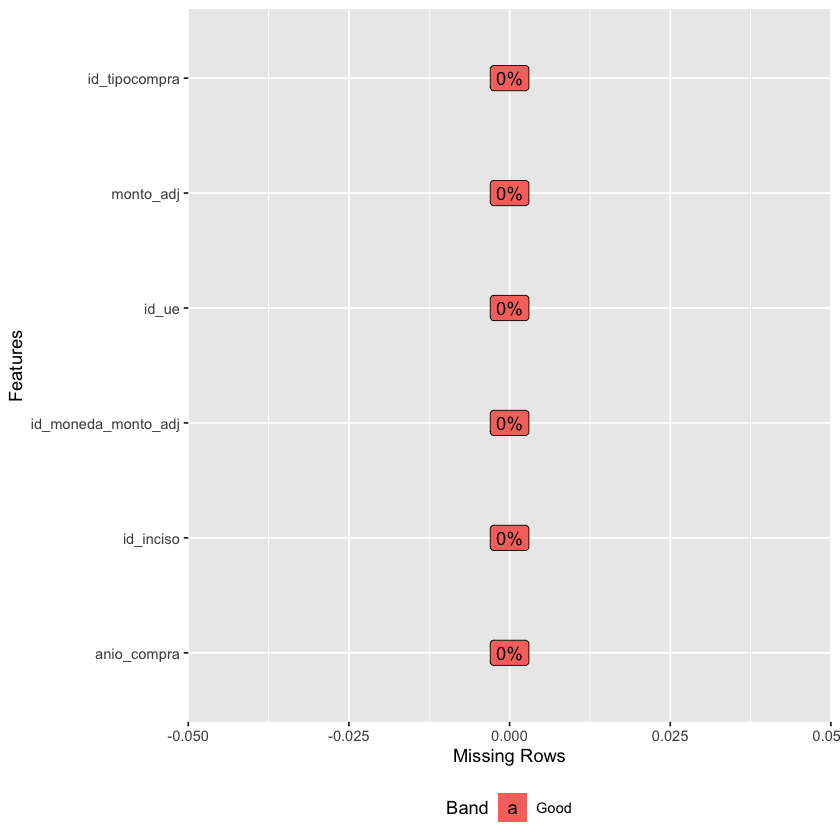

In [20]:
#Columnas vacias del dataSelect
plot_missing(dataSelect)

In [21]:
# Recordemos que columnas tiene el dataSelect
colnames(dataSelect)

[1] "anio_compra"         "id_inciso"           "id_moneda_monto_adj"
[4] "id_ue"               "monto_adj"           "id_tipocompra"

## 2. Transformación de valores inválidos

<a id= Transformación-Invalidos></a>
### Montos valor 0

---


In [22]:
# Vamos a contar cantidad de valores "" en las siguientes columnas:

# Imprimo cantidad
print("Cantidad de Valores Vacios:")

cantMontoVacio <- dataSelect %>% select(monto_adj) %>% 
                            filter(monto_adj == 0) %>%  
                            count()
print(paste("Monto Adjudicado: ", cantMontoVacio))

[1] "Cantidad de Valores Vacios:"
[1] "Monto Adjudicado:  2108"


In [23]:
# Se detectaron 2108 adjudicaciones con valor 0

# Limpiamos los valores mencionados
na_rows <- which(is.na(dataSelect$monto_adj))
dataSelect <- dataSelect[-c(na_rows), ]
length(dataSelect$monto_adj)

[1] 0

### Transformación de Monedas
---